In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [65]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
data.shape

(42000, 785)

In [80]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)  # shuffle before splitting into dev and training sets

In [88]:
data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_test = X_test / 255
_,m_train = X_train.shape

In [89]:
X_train.shape

(784, 41000)

In [120]:
def init_params():
    w1 = np.random.randn(10, 784) * 0.01 
    b1 = np.zeros((10, 1)) 
    w2 = np.random.randn(10, 10) * 0.01 
    b2 = np.zeros((10, 1)) 
    return [w1, b1, w2, b2]

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    exp_values = np.exp(Z - np.max(Z, axis=0))  
    return exp_values / np.sum(exp_values, axis=0)
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [90]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2  

In [91]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 0.001, 500)

Iteration:  0
[1 5 1 ... 1 7 1] [4 2 4 ... 3 3 1]
0.13063414634146342
Iteration:  10
[9 2 2 ... 8 7 8] [4 2 4 ... 3 3 1]
0.30009756097560975
Iteration:  20
[9 2 9 ... 8 3 1] [4 2 4 ... 3 3 1]
0.5392439024390244
Iteration:  30
[9 2 4 ... 8 3 1] [4 2 4 ... 3 3 1]
0.6540487804878049
Iteration:  40
[9 2 4 ... 8 3 1] [4 2 4 ... 3 3 1]
0.7116097560975609
Iteration:  50
[9 2 4 ... 8 3 1] [4 2 4 ... 3 3 1]
0.7482439024390244
Iteration:  60
[9 2 4 ... 3 3 1] [4 2 4 ... 3 3 1]
0.7745121951219512
Iteration:  70
[9 2 4 ... 3 3 1] [4 2 4 ... 3 3 1]
0.7953658536585366
Iteration:  80
[9 2 4 ... 3 3 1] [4 2 4 ... 3 3 1]
0.811219512195122
Iteration:  90
[9 2 4 ... 3 3 1] [4 2 4 ... 3 3 1]
0.824
Iteration:  100
[9 2 4 ... 3 3 1] [4 2 4 ... 3 3 1]
0.8318536585365853
Iteration:  110
[4 2 4 ... 8 3 1] [4 2 4 ... 3 3 1]
0.7935121951219513
Iteration:  120
[4 2 4 ... 3 3 1] [4 2 4 ... 3 3 1]
0.8454146341463414
Iteration:  130
[4 2 4 ... 3 3 1] [4 2 4 ... 3 3 1]
0.8549268292682927
Iteration:  140
[4 2 4 ... 3 

In [121]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


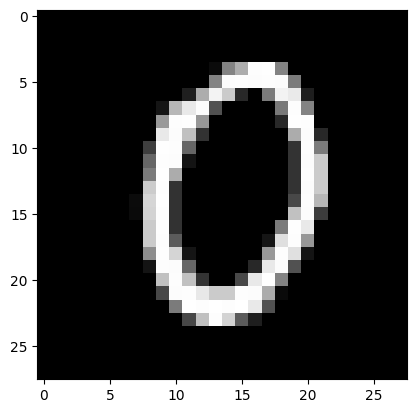

In [128]:
test_prediction(10, W1, b1, W2, b2)